<a href="https://colab.research.google.com/github/BeeMugo9/BeeMugo9/blob/main/Formulating_Hypotheses_and_Hypotheses_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Define Problem Statement and Objectives

#Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

#Objective
The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?

## Import all the necessary libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

## Reading the Data into a DataFrame

In [2]:
# upload files
from google.colab import files
uploaded = files.upload()

Saving abtest.csv to abtest.csv


In [3]:
df2=pd.read_csv('abtest.csv')
print(df2)

    user_id      group landing_page  time_spent_on_the_page converted  \
0    546592    control          old                    3.48        no   
1    546468  treatment          new                    7.13       yes   
2    546462  treatment          new                    4.40        no   
3    546567    control          old                    3.02        no   
4    546459  treatment          new                    4.75       yes   
..      ...        ...          ...                     ...       ...   
95   546446  treatment          new                    5.15        no   
96   546544    control          old                    6.52       yes   
97   546472  treatment          new                    7.07       yes   
98   546481  treatment          new                    6.20       yes   
99   546483  treatment          new                    5.86       yes   

   language_preferred  
0             Spanish  
1             English  
2             Spanish  
3              French  
4  

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

##Viewing the first and last few rows of the dataset

In [4]:
df2.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [5]:
df2.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


##Checking the shape of the dataset

In [7]:
df2.shape

(100, 6)

The dataset has 100 columns and 6 rows

##Getting the statistical summary for the variables

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


The dataset is made up of 4 object datatype rows, 1 integer and 1 float

#Getting the statistical summary for the numerical variables

In [10]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


User ID:

This identifier is unique to each user in the dataset.
The dataset encompasses 100 users, with IDs ranging from 546443 to 546592.

The average user ID is 546517, with a standard deviation of approximately 52.30. This suggests a fairly even distribution of user IDs across the dataset.

Time Spent on the Page:

This metric measures the duration (in minutes) that users spend on a page.
The average time spent on the page by users is approximately 5.38 minutes, indicating a moderate level of engagement.

The minimum time recorded is 0.19 minutes, and the maximum is 10.71 minutes, showing a wide range of user engagement times.

The median time spent is slightly above the average at 5.42 minutes, suggesting that more than half of the users spend more than the average time on the page.

#Getting the statistical summary for the categorical variables

In [16]:
df2_columns=df2.select_dtypes(include=['object']).columns
df2[df2_columns].describe().T

,count,unique,top,freq
group,100,2,control,50
landing_page,100,2,old,50
converted,100,2,yes,54
language_preferred,100,3,Spanish,34


The categorical variables in the dataset offer insightful details about user behavior and characteristics. Below is a summary of these variables:

Group:

This variable categorizes users into two groups: 'control' and 'treatment'.
Out of the 100 observations, each group ('control' and 'treatment') appears 50 times, indicating an equal distribution of users in both groups.

Landing Page:

The 'landing_page' variable distinguishes between two types of pages: 'old' and 'new'.
Similar to the 'group' variable, there is an equal split in the dataset with each type of landing page ('old' and 'new') being represented by 50 observations each.

Converted:

This variable indicates whether a user converted or not, with possible values being 'yes' or 'no'.
In the dataset, 'yes' appears more frequently with 54 instances, suggesting that a slight majority of the users ended up converting.

Language Preferred:

The 'language_preferred' variable captures the preferred language of the user, which includes 'Spanish', 'English', and 'French'.
'Spanish' is the most common preference, represented by 34 users, followed by 'English' and 'French'. This indicates a diverse user base in terms of language preference.

#Checking for missing values

In [17]:
df2.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

The dataset has no missing values

#Check for duplicates

In [18]:
df2.duplicated().sum()

0

The data set contains no duplicates

### Univariate Analysis

###Time spent on the page

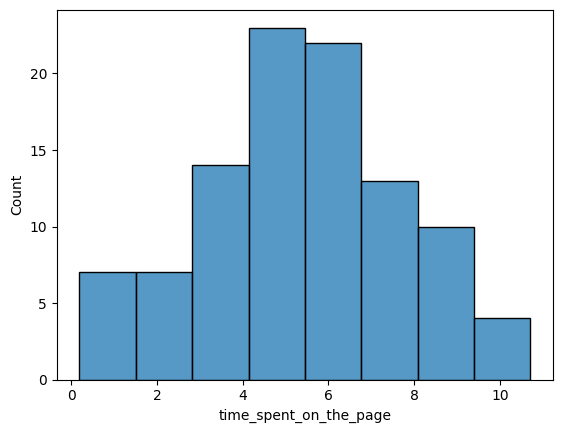

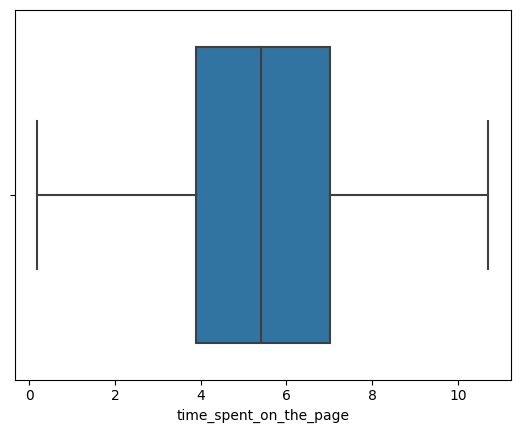

In [19]:
sns.histplot(data=df2,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df2,x='time_spent_on_the_page')
plt.show()

Histogram Plot
Description: The histogram displays the frequency distribution of the 'time spent on the page'.

Interpretation:

The histogram appears to be somewhat symmetric or slightly right-skewed, indicating that most users spend a moderate amount of time on the page, with fewer users spending very short or very long durations.

The presence of bars across a range of time intervals suggests a varied engagement time among users.

Boxplot
Description: The boxplot visualizes the spread and central tendency of the 'time spent on the page'.

Interpretation:

The central box of the plot represents the interquartile range (IQR), encompassing the middle 50% of the data.

The line inside the box marks the median (or 50th percentile) of the data, giving an idea of the typical time spent on the page.In this case, it's around the 5.4-minute mark. The 'whiskers' extend from either side of the box to the minimum and maximum values that are not considered outliers.

[The box plot demonstrates that the distribution of time users spent on the page is fairly concentrated with a median slightly above 5 minutes. The data is relatively symmetric around the median, with no extreme outliers, indicating a consistent user engagement on the page.]

##Group

In [20]:
df2['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

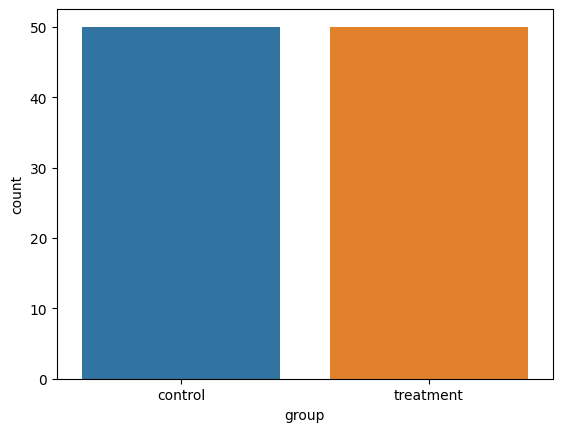

In [21]:
sns.countplot(data=df2,x='group')
plt.show()

Equal Representation:
Both groups are equally represented in the dataset, with each group having 50 users. This equal representation ensures fairness in the comparison and allows for more accurate conclusions about the effect of the treatment or intervention being tested.

##Landing page

In [22]:
df2['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

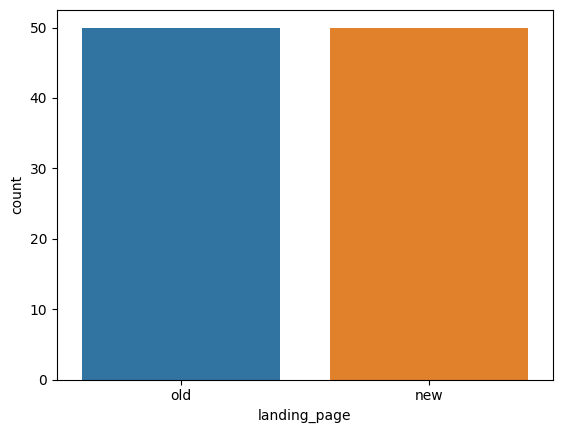

In [24]:
sns.countplot(data=df2,x='landing_page')
plt.show()

This plot displays the counts or frequencies of users associated with different types of landing pages.

The x-axis represents the categories within the 'landing_page' column, typically 'old' and 'new'.

The y-axis shows the number of users who visited each type of landing page.

Equal Distribution:

The plot illustrates an equal distribution between the two types of landing pages, 'old' and 'new'. Each type of landing page has been visited by 50 users in the dataset.

##Converted

In [25]:
df2['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

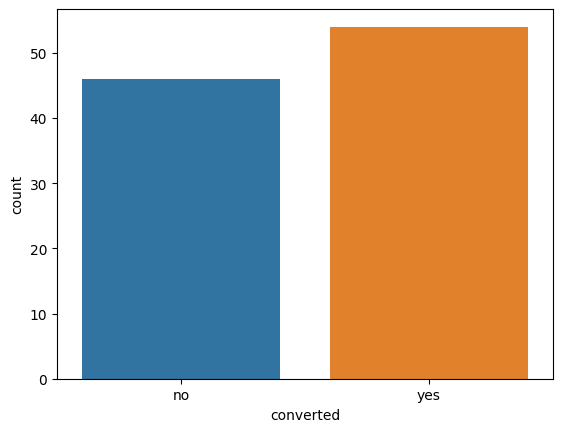

In [26]:
sns.countplot(data=df2,x='converted')
plt.show()

This plot visualizes the frequency of conversion status among users.
The x-axis categorizes users based on whether they converted ('yes') or not ('no').
The y-axis shows the count of users in each conversion category.

It offers a glimpse into the effectiveness of the website or campaign from a conversion standpoint. The fact that conversions are slightly more frequent than non-conversions could be a positive indicator for the website or campaign's performance.

##Language preferred

In [27]:
df2['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

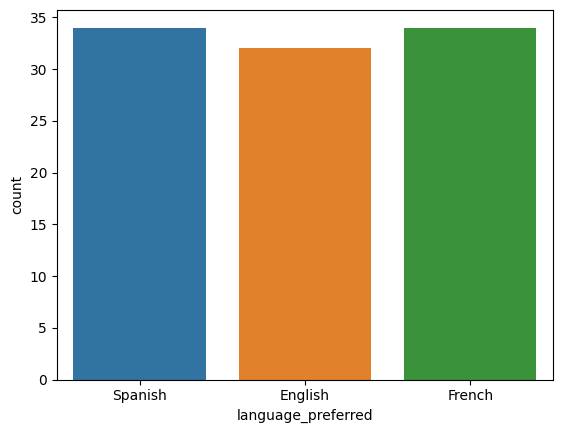

In [28]:
sns.countplot(data=df2,x='language_preferred')
plt.show()

This plot illustrates the frequency distribution of the preferred language among users.
The x-axis represents the different languages preferred by the users, such as 'Spanish', 'English', and 'French'.
The y-axis indicates the count of users who prefer each language.
The height of each bar corresponds to the number of users for each language preference.

**Distribution of Language Preferences: **

The plot shows that the most preferred language among the users is 'Spanish', followed by 'English' and then 'French'.


**User Diversity: **

This distribution signifies a diverse user base in terms of language preferences, which could be important for tailoring content, marketing strategies, or user experience to suit different linguistic groups.


**Insights for Localization: **

The prevalence of 'Spanish' as the most preferred language may suggest a focus area for localized content or targeted marketing efforts. Similarly, the presence of 'English' and 'French' speaking users underlines the need for multilingual support.

### Bivariate Analysis

###Landing page vs Time spent on the page

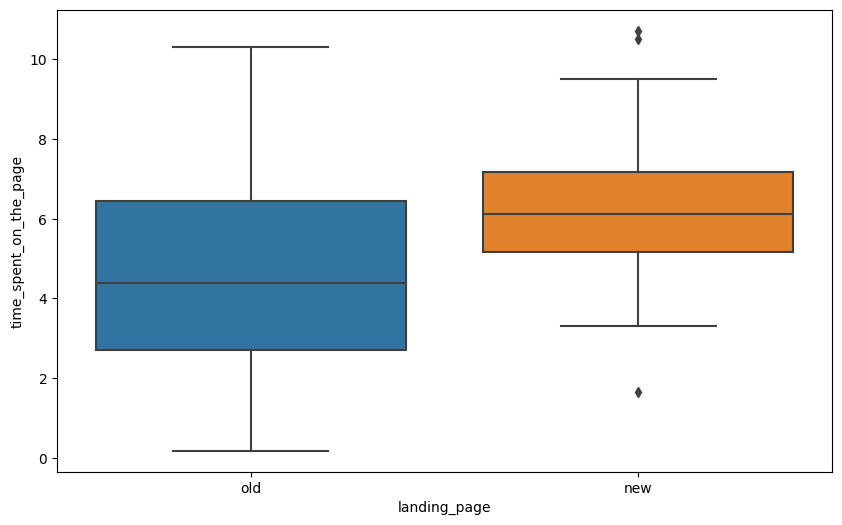

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df2,x='landing_page',y='time_spent_on_the_page')
plt.show()

This plot shows the distribution of the time users spent on the page, segmented by the type of landing page ('old' vs. 'new').
The x-axis categorizes the data into two groups based on the landing page type.
The y-axis represents the time (in minutes) spent on the page.
Each box in the plot represents the interquartile range (IQR) for the time spent on the page, with a line within the box indicating the median.

Differences in Median Time:

There is a noticeable difference in the median time spent on the page between the old and new landing pages (4.5 and 6.5 respectively). The new landing page appears to have a higher median time compared to the old one.

Spread of Data:

The spread (IQR) for both types of landing pages is significant, indicating variability in how long users spend on the page. However, the IQR for the new landing page is wider, suggesting greater variability.

[The boxplot suggests that the new landing page is potentially more engaging, as indicated by the higher median time users spend on it (6.5 minutes)compared to the old page (4.5 minutes). The variability in time spent on both pages also highlights the diverse nature of user engagement. The absence of significant outliers suggests a consistent user experience across both types of pages]

##Conversion status vs Time spent on the page

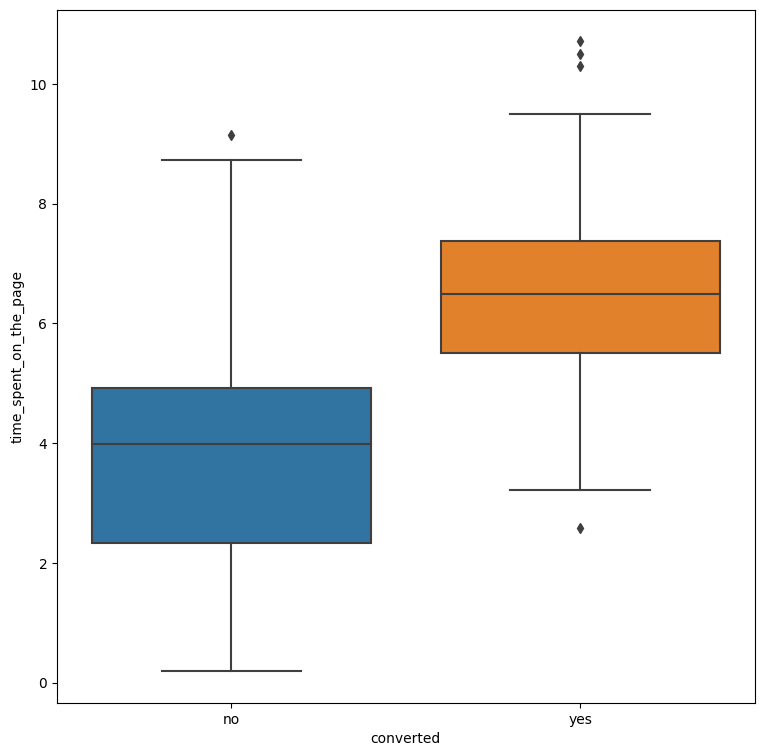

In [31]:
plt.figure(figsize=(9, 9))
sns.boxplot(data = df2, x = 'converted', y = 'time_spent_on_the_page')
plt.show()

The x-axis categorizes the data based on the conversion status of users, with categories 'yes' and 'no'.
The y-axis represents the time users spent on the page, measured in minutes.
Each boxplot shows the distribution of time spent on the page for each conversion status.

Difference in Median Time:

There is a notable difference in the median time spent on the page between users who converted and those who did not. Users who converted ('yes') have a higher median time spent on the page compared to users who did not convert ('no').

Outliers:

There are a few outliers in both categories, but they are more pronounced in the 'converted' category. These outliers represent users who spent unusually more or less time on the page than most others.

[The boxplot suggests a strong correlation between the time spent on the page and the likelihood of conversion. Users who spend more time on the page are generally more likely to convert. The wider spread in the 'converted' category implies that while many converted users spend a lot of time on the page, there's still a significant variation.]

##Language preferred vs Time spent on the page

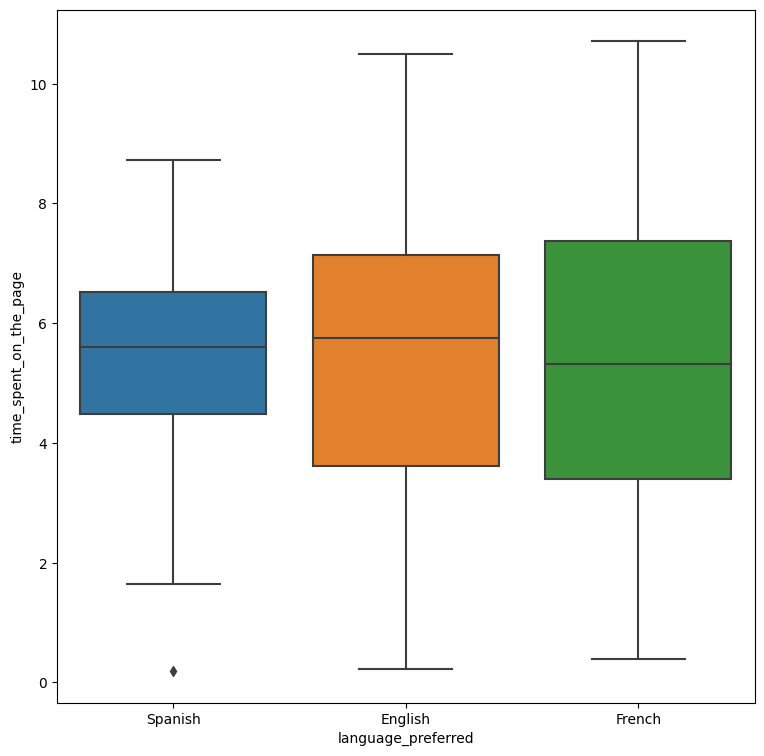

In [34]:
plt.figure(figsize=(9, 9))
sns.boxplot(data = df2, x ='language_preferred', y = 'time_spent_on_the_page')
plt.show()

The x-axis categorizes users based on their preferred language, which includes languages like 'Spanish', 'English', and 'French'.
The y-axis represents the time spent on the page, measured in minutes.
Each boxplot shows the distribution of time spent on the page for each language preference.

Median Time Across Languages:

There are noticeable differences in the median time spent on the page among the different language preference groups. The medians for each language group vary(Spanish=5.5, English=5.7 and French=4.9), this suggests differences in engagement and content interaction based on language preference.


Spread of Data:

The spread (IQR) differs among the language groups. This indicates variability in the time spent on the page within each language group. English group show a wider spread, suggesting more variability in user engagement times.

Outliers:

There appear to be a few outliers in the spanish language category. These outliers represent users who spent significantly more or less time on the page than the average user in the spanish language group.

[The boxplot provides insights into user engagement with the webpage content, segmented by language preference. The differences in median times and the spread of data across the language groups reflect varying levels of accessibility for users of different languages. The presence of outliers in the groups indicates that while there are typical user engagement patterns for each language, there are also exceptions.]

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

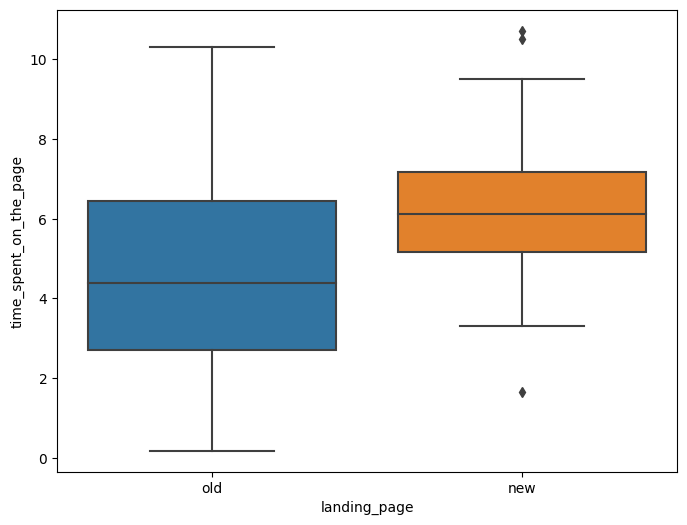

In [33]:
# visual analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot( data = df2, x = 'landing_page', y = 'time_spent_on_the_page')
plt.show()

The x-axis categorizes the data into two types of landing pages: 'old' and 'new'.
The y-axis represents the time users spent on these pages, measured in minutes.
Each boxplot shows the distribution of time spent on the page for each type of landing page

Median Time:

The median time spent on the new landing page appears to be higher (6.5minutes) than that on the old landing page (4.5 minutes). This suggests that, on average, users spend more time on the new page.

Spread of Time Spent:

The IQR for the new landing page is broader than for the old page, indicating a greater variability in the time users spend on the new page.

Potential Outliers:
There are a few outliers on both the new and old landing pages, indicating some users spent significantly more or less time on these pages than a typical user.

[The boxplot demonstrates that users tend to spend more time on the new landing page compared to the old one, suggesting higher engagement with the new page. The wider spread in time on the new page also indicates diverse user interactions, which could be due to various factors like design, content, or user interest.]

### Step 1: Define the null and alternate hypotheses

H0: The mean time spent on the new landing page is equal to or less than the mean time spent on the existing landing page.

H0:μnew≤μold


Ha:The mean time spent on the new landing page is greater than the mean time spent on the existing landing page.

Ha:μnew>μold

### Step 2: Select Appropriate test

The appropriate statistical test to use is the Independent Samples t-test ( two-sample t-test). The reasons for selecting this test are as follows:

One-tailed Test: We are interested in testing whether one mean (time spent on the new landing page) is greater than the other (time spent on the existing landing page), which constitutes a one-tailed test.

Two Independent Populations: The test involves comparing the means of two different groups (users of the new landing page vs. users of the existing landing page). These groups are independent of each other.

Unknown Population Standard Deviations: The standard deviations of the populations are not known.

### Step 3: Decide the significance level

As given in the problem statement, the level of signifacnce will be α=0.05


### Step 4: Collect and prepare data

In [36]:
# create subsetted data frame for new landing page users
new_page_users= df2[df2['landing_page'] == 'new']['time_spent_on_the_page']

# create subsetted data frame for old landing page users
old_page_users = df2[df2['landing_page'] == 'old']['time_spent_on_the_page']

In [38]:
new_page_users.head(), old_page_users.head()

(1     7.13
 2     4.40
 4     4.75
 6     5.25
 8    10.71
 Name: time_spent_on_the_page, dtype: float64,
 0    3.48
 3    3.02
 5    5.28
 7    6.53
 9    2.08
 Name: time_spent_on_the_page, dtype: float64)

In [39]:
print('The sample standard deviation of the time spent on the new page is:', round(new_page_users.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(old_page_users.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the new page is: 2.58


Let's compare the two standard deviations:

The largest standard deviation (2.58 for old page users) is not more than twice the smallest standard deviation (1.82 for new page users).

2.58 is not greater than 2
×
1.82

Based on this guideline, it might be reasonable to assume that the population standard deviations are not significantly different.

### Step 5: Calculate the p-value

In [42]:
# complete the code to import the required function
from scipy.stats import stats

In [50]:
df2.columns




Index(['user_id', 'group', 'landing_page', 'time_spent_on_the_page',
       'converted', 'language_preferred'],
      dtype='object')

In [59]:
# complete the code to import the required function
from scipy.stats import stats

# write the code to calculate the p-value
test_stat, p_value =  stats.ttest_ind(new_page_users, old_page_users, equal_var = False, alternative = ('greater'))

print('The p-value is', p_value)

The p-value is 0.0001392381225166549


<ipython-input-59-e727c18bb0b9>:5: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  test_stat, p_value =  stats.ttest_ind(new_page_users, old_page_users, equal_var = False, alternative = ('greater'))


P value of 0.0001 ≤ 0.05.

This suggevsts that there is strong evidence against the null hypothesis, we therefore support the alternative hypothesis that users spend more time on the new landing page

### Step 6: Compare the p-value with $\alpha$

In [60]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

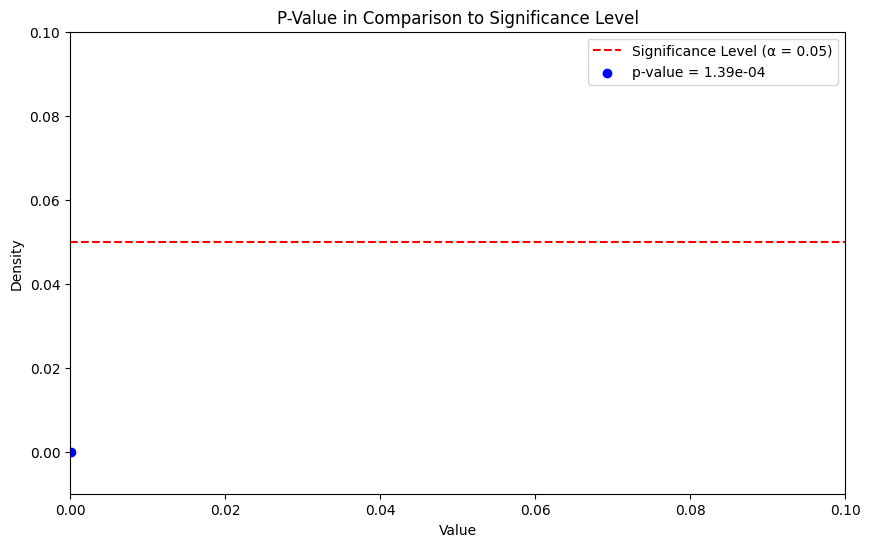

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Information for plotting
p_value = 0.0001392381225166549
alpha = 0.05  # Common level of significance

# Plotting
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [alpha, alpha], color='red', linestyle='--', label=f'Significance Level (α = {alpha})')
plt.scatter(p_value, 0, color='blue', label=f'p-value = {p_value:.2e}')
plt.xlim(0, 0.1)
plt.ylim(-0.01, 0.1)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('P-Value in Comparison to Significance Level')
plt.legend()
plt.show()


By rejecting the null hypothesis, we infer that there is statistically significant evidence to support the alternative hypothesis, which states that users spend more time on the new landing page compared to the existing (old) landing page.

This suggests that the new landing page is more effective in terms of user engagement time.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

# Perform Visual Analysis

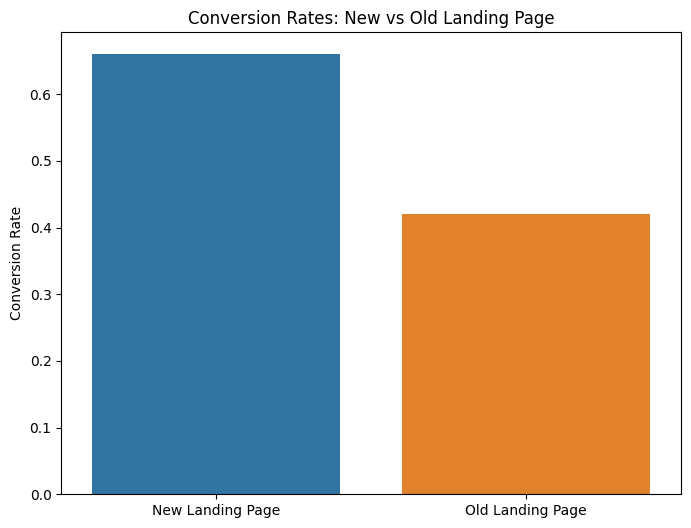

In [63]:

# Creating subsetted dataframes for new and old landing page users
new_page_users = df2[df2['landing_page'] == 'new']
old_page_users = df2[df2['landing_page'] == 'old']

# Calculating conversion rates
conversion_rate_new = new_page_users['converted'].value_counts(normalize=True).get('yes', 0)
conversion_rate_old = old_page_users['converted'].value_counts(normalize=True).get('yes', 0)

# Creating a bar plot for conversion rates
plt.figure(figsize=(8, 6))
sns.barplot(x=['New Landing Page', 'Old Landing Page'], y=[conversion_rate_new, conversion_rate_old])
plt.ylabel('Conversion Rate')
plt.title('Conversion Rates: New vs Old Landing Page')
plt.show()


Higher Bar for New Page:

Since the bar for the new landing page is higher than that for the old page, it suggests a higher conversion rate for the new landing page.

#Step 1: Define the null and alternate hypotheses

HO: The conversion rate for the new landing page is less than or equal to the conversion rate for the old landing page.

H0: μnew ≤μold

H1: The conversion rate for the new landing page is greater than that for the old landing page.


H1: μnew > μold

#Step 2: Select Appropriate test

Comparing Proportions: Since you're comparing conversion rates, which are proportions, you're dealing with categorical data.

Two Independent Samples: The data from the new and old landing pages are independent of each other.

Large Sample Size: If each group (new and old landing page visitors) is large enough (typically, each expected count should be at least 5), then normal approximation can be used.

Given these considerations, the appropriate statistical test is a Two-Proportion Z-test. This test is used to determine whether two proportions are different from each other.

#Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

#Step 4: Collect and prepare data

In [74]:
# Subset the data for new and old landing pages
new_page_data = df2[df2['landing_page'] == 'new']
old_page_data = df2[df2['landing_page'] == 'old']

# Calculate number of conversions and total number of users for each group
conversions_new = new_page_data['converted'].value_counts().get('yes', 0)
total_new_treatment = len(new_page_data)

conversions_old = old_page_data['converted'].value_counts().get('yes', 0)
total_old_control = len(old_page_data)

# Print the calculated values for verification
print("New Page - Conversions:", conversions_new, ", Total Users:", total_new_treatment)
print("Old Page - Conversions:", conversions_old, ", Total Users:", total_old_control)


New Page - Conversions: 33 , Total Users: 50
Old Page - Conversions: 21 , Total Users: 50


#Step 5: Calculate the p-value

In [75]:
from statsmodels.stats.proportion import proportions_ztest

# Assuming conversions_new is the number of conversions on the new page,
# conversions_old is the number of conversions on the old page,
# total_new_treatment is the total number of users who visited the new page,
# and total_new_control is the total number of users who visited the old page.

# Write the code to calculate the p-value
test_stat, p_value = proportions_ztest([conversions_new, conversions_old], [total_new_treatment, total_old_control], alternative=('larger'))

print('The p-value is', p_value)

The p-value is 0.008026308204056278


The P value of 0.008 < 0.05. This indicates strong evidence against the null hypothesis, suggesting that the conversion rate for the new page is significantly greater than for the old page.

#Step 6: Compare the p-value with  𝛼

In [76]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


#Step 7: Draw inference

 Because the p-value is smaller than the threshold, you reject the null hypothesis.

 By rejecting the null hypothesis, this implies there is statistically significant evidence to suggest that the conversion rate for the new landing page is greater than that for the old landing page.

Practical Implication: From a practical standpoint, this result could be interpreted as the new landing page being more effective at converting visitors than the old page. This might be due to various factors like improved design, better content, more engaging calls to action, etc.

# 3. Does the converted status depend on the preferred language?

#Perform Visual Analysis

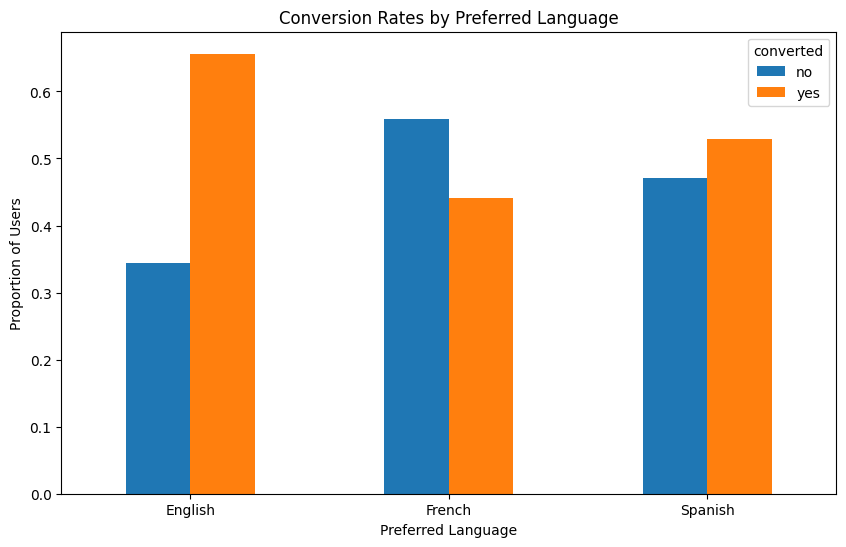

In [77]:
# Create a contingency table
contingency_table = pd.crosstab(df2['language_preferred'], df2['converted'])

# Normalize the contingency table to get proportions
contingency_table_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Plotting
contingency_table_normalized.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Conversion Rates by Preferred Language')
plt.xlabel('Preferred Language')
plt.ylabel('Proportion of Users')
plt.xticks(rotation=0)
plt.show()


#Step 1: Define the null and alternate hypotheses

Null Hypothesis (H0): There is no association between conversion status and preferred language.

(they are independent)

Alternative Hypothesis (H1): There is an association between conversion status and preferred language.

(they are not independent)

#Step 2: Select Appropriate test

Categorical Variables: Both conversion status and preferred language are categorical variables. The Chi-Square test is ideal for such data.

Independence Assessment: This test assesses whether the observed frequencies in a contingency table (which cross-tabulates the two variables) significantly differ from the frequencies you would expect if the two variables were independent of each other.

Non-Parametric: The test doesn't assume anything about the distribution of the variables (unlike t-tests or ANOVA which assume normally distributed data).

For testing the hypothesis that there is an association between conversion status (converted/not converted) and preferred language, the most appropriate statistical test is the Chi-Square Test of Independence. This test is specifically designed to determine if there is a significant relationship between two categorical variables.

#Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

#Step 4: Collect and prepare data

In [79]:
# contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(df2['converted'], df2['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


#Step 5: Calculate the p-value

In [80]:
# Import the required function
from scipy.stats import chi2_contingency

# Write the code to calculate the p-value
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)

print('The p-value is', p_value)


The p-value is 0.21298887487543447


Since 0.213 > 0.05, the p-value exceeds the common threshold for statistical significance.

we fail to reject the null hypothesis.

#Step 6: Compare the p-value with 𝛼

In [81]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


#Step 7: Draw inference

we fail to reject the null hypothesis of the Chi-Square Test of Independence. Independence of Variables: This suggests that there is not enough statistical evidence to conclude that there is a significant association between the two categorical variables being tested (such as conversion status and preferred language).

Practical Implication:

In practical terms, this means that, based on the provided data, conversion status does not appear to be dependent on the preferred language. The two variables seem to operate independently of each other in the context of the data analyzed.

## 4. Is the time spent on the new page same for the different language users?

#Perform Visual Analysis

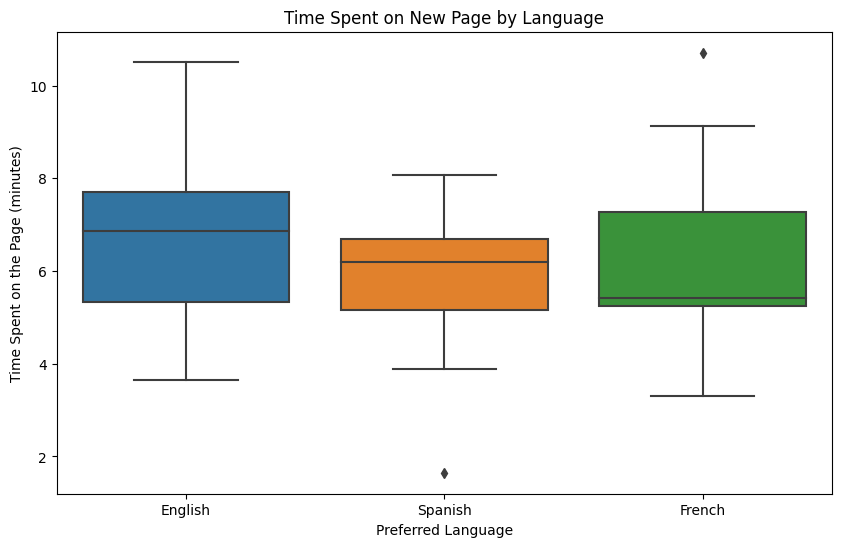

In [83]:

# Filter the data for users on the new landing page
new_page_data = df2[df2['landing_page'] == 'new']

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data=new_page_data)
plt.title('Time Spent on New Page by Language')
plt.xlabel('Preferred Language')
plt.ylabel('Time Spent on the Page (minutes)')
plt.show()


Significant differences in the median lines across language groups suggests variations in time spent on the new page by users of different languages.

In [86]:
new_page_data.groupby(['language_preferred'])['time_spent_on_the_page'].mean()


language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

#Step 1: Define the null and alternate hypotheses


Null Hypothesis;
H0: The mean time spent on the new landing page is the same across all language preferences.


Alternative Hypothesis;
Ha: The mean time spent on the new landing page is not the same across all language preferences.

#Step 2: Select Appropriate test

For testing the hypothesis "Is the time spent on the new page the same for different language users?" where we are comparing the means of a continuous variable (time spent on the page) across multiple groups (different language preferences), the appropriate statistical test is One-Way ANOVA (Analysis of Variance).

Why One-Way ANOVA?

Multiple Groups Comparison:

 One-Way ANOVA is used when you want to compare the means of a continuous variable across more than two independent groups. In this case, these groups are the different language preferences. i.e, (there is a difference in the mean time spent on the new page among at least two language preferences.)

Assumptions:

This test assumes that the data for each group are normally distributed and have equal variances (homoscedasticity). However, it's robust to minor violations of these assumptions, especially with larger sample sizes.

Testing for Mean Differences:

ANOVA tests the null hypothesis that all groups have the same population mean. If the test finds significant differences, it suggests that at least one group differs from the others, but it doesn't specify which groups are different.

#Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

#Step 4: Collect and prepare data

In [88]:
# create a subsetted data frame of the time spent on the new page by English language users
time_spent_English = df2[df2['language_preferred']=="English"]['time_spent_on_the_page']

# create subsetted data frames of the time spent on the new page by French and Spanish language users
time_spent_French = df2[df2['language_preferred']=="French"]['time_spent_on_the_page']
time_spent_Spanish = df2[df2['language_preferred']=="Spanish"]['time_spent_on_the_page']


#Step 5: Calculate the p-value



In [89]:
# Import the required function
from scipy.stats import f_oneway

# Assuming time_spent_English, time_spent_French, and time_spent_Spanish are already defined
# Write the code to calculate the p-value
test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)

print('The p-value is', p_value)


The p-value is 0.8665610536012648


#Step 6: Compare the p-value with 𝛼

Since the p-value (approximately 0.867) is greater than the significance level of 0.05, it is not lower than the typical threshold for declaring statistical significance.

We fail to reject the null hypothesis.

#Step 7: Draw inference

Fail to Reject the Null Hypothesis:

Given that the p-value is higher than 0.05, we fail to reject the null hypothesis. This suggests that there is not enough statistical evidence to support the claim that the average time spent on the new page is different among users who prefer different languages.


Interpretation:

Based on this result, it would be inferred that the preference for English, French, or Spanish does not significantly affect the amount of time users spend on the new page. In other words, the time spent on the new page appears to be similar across these language preference groups.

## Conclusion and Business Recommendations

##Conclusions

Comparison of Time Spent on New vs. Old Landing Page:

There was a significant difference in the time users spent on the new landing page compared to the old one. Users generally spent more time on the new page, suggesting higher engagement or interest.

Conversion Rates on New vs. Old Landing Page:

The conversion rate was found to be significantly higher for the new landing page compared to the old one. This indicates that the new page is more effective at converting visitors.

Relationship Between Conversion and Preferred Language:

The analysis did not find a significant association between the conversion status and preferred language. This suggests that the likelihood of conversion is independent of the user's language preference.

Time Spent on New Page by Language Preference:

There was no significant difference in the time spent on the new page among users of different language preferences. This implies that the new page is equally engaging across different language groups.


##Business Recommendations
Focus on the New Landing Page:

Given its higher engagement and conversion rates, prioritize and continue developing the new landing page. Consider allocating more resources to its optimization and promotion.

Language Neutral Strategies:

Since conversion rates and time spent on the page are not significantly affected by language preferences, continue to adopt language-neutral strategies in design and content. However, maintaining multilingual support remains essential for inclusivity and broader reach.

Further Optimization and Testing:

Regularly update and test various elements of the new landing page (like CTAs, layout, and content) to further optimize user engagement and conversion rates.

User Experience Analysis:

Conduct qualitative research, such as user feedback surveys or usability testing, to gain insights into why users spend more time on the new page and why they are more likely to convert there. This can guide more targeted improvements.

Monitor Performance Across Segments:

Continuously monitor the performance of the landing page across different user segments. Even though no significant differences were found in this analysis, user preferences and behaviors can evolve over time.

Data-Driven Decision Making:

Maintain a data-driven approach for decision making. Regularly review and analyze user data to inform strategies and adapt to changing user needs and market trends.

##conclusion
In conclusion, the new landing page has proven to be more effective in engaging users and converting them. It's recommended to focus on optimizing this page while continuing to monitor user behavior and performance metrics to adapt and refine strategies over time.

___